In [5]:
import numpy as np
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt

In [6]:
# from google.colab import drive
# drive.mount('/content/drive/')

In [7]:
data = pd.read_csv('./data/bioresponse.csv', header=0, sep=',')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [8]:
from matplotlib.colors import ListedColormap
from sklearn import  datasets, metrics, tree 

from sklearn.model_selection import  learning_curve
from sklearn.ensemble import RandomForestClassifier

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [10]:
feats = data.loc[:, data.columns != 'Activity']
target = data["Activity"]
# feats.sort_values(by='D2').head()
print(feats.shape)
feats.head()

(3751, 1776)


,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,...,0,0,0,0,0,0,0,0,0,0
1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,...,1,1,1,1,0,1,0,0,1,0
2,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,...,0,0,0,0,0,0,0,0,0,0
4,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,...,0,0,0,0,0,0,0,0,0,0


In [11]:
train_x, test_x, train_y, test_y = train_test_split(feats, target, train_size = .3, random_state = 1)

# reshaping data
# train_x, test_x, train_y, test_y = np.asarray(train_x).T, np.asarray(test_x).T, np.asarray(train_y).T, np.asarray(test_y).T
# train_x, test_x, train_y, test_y = np.asarray(train_x), np.asarray(test_x), np.asarray(train_y), np.asarray(test_y)
# train_x, test_x, train_y, test_y = np.asarray(train_x), np.asarray(test_x), np.asarray(train_y), np.asarray(test_y)

*   Apply the logistic regression method using the functions in the notebook «Logistic Regression as a Neural Network – BP alg.ipynb” to predict the biological response of a molecule 

In [12]:
# activate function
def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    z -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """
    
    s = 1./(1. + np.exp(-z))
    
    return s

In [13]:
# initialize weights and bias with zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    w = np.zeros((dim,1))
    b = 0.
    
    return w, b

In [14]:
# propagation

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size which equals the number of features
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    """

    m = X.shape[1]
    # print('number of objects = ', len(X))
    
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)                                 # compute activation
    cost = -(1./m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A), axis=1)   # compute cost
    # print(A)
    # print(np.sum(Y * np.log(A) + (1-Y) * np.log(1-A), axis=1))
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1./m) * np.dot(X, (A-Y).T)
    db = (1./m) * np.sum(A-Y, axis=1)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [15]:
# initializing parameters

# w, b, X, Y = np.array([[1.],[-1.]]), 4., np.array([[1.,5.,-1.],[10.,0.,-3.2]]), np.array([[0,1,1]])
# w, b, X, Y = np.ones((train_x.shape[1], 1)), 4., train_x.T, train_y
# w, b, X, Y = np.random.rand(train_x.shape[1], 1), 4., train_x.T, train_y
w, b, X, Y = np.float32(np.random.randint(-1, 1, size=(train_x.shape[1], 1))), 4., np.asarray(train_x).T, np.asarray(train_y)

grads, cost = propagate(w, b, X, Y)
print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))
print("cost = " + str(cost))

dw = [[-0.03931852]
 [-0.33046485]
 [-0.04613333]
 ...
 [-0.00533333]
 [-0.016     ]
 [-0.00888889]]
db = [-0.55111111]
cost = [44.51213102]


In [16]:
# optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """
    
    costs = []
    
    for i in range(num_iterations):
                
        # Cost and gradient calculation 
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [17]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 1000, learning_rate = 0.005, print_cost = True)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

Cost after iteration 0: 44.512131
Cost after iteration 100: 35.736767
Cost after iteration 200: 26.961958
Cost after iteration 300: 18.304459
Cost after iteration 400: 12.328420
Cost after iteration 500: 10.039721
Cost after iteration 600: 8.792908
Cost after iteration 700: 7.830621
Cost after iteration 800: 7.008163
Cost after iteration 900: 6.307782
w = [[-0.87577474]
 [-0.31291023]
 [ 0.14738564]
 ...
 [-0.9733567 ]
 [ 0.07999965]
 [-0.95553493]]
b = [5.0390782]
dw = [[-0.0119096 ]
 [ 0.00964766]
 [-0.01313821]
 ...
 [-0.00533333]
 [-0.016     ]
 [-0.00888889]]
db = [0.04758723]


In [18]:
# predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities 
    A = sigmoid(np.dot(w.T,X) + b)
    
    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if (A[0,i] <= 0.5):
            Y_prediction[0][i] = 0
        else:
            Y_prediction[0][i] = 1
    
    return Y_prediction

In [19]:
# w = np.array([[0.1124579], [0.23106775]])
w = np.random.rand(np.asarray(train_x).shape[1], 1)
b = -0.3
# X = np.array([[1.,-1.1,-3.2], [1.2,2.,0.1]])
X = train_x.T
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 1. ... 1. 1. 1.]]


*   Modify optimize() function to implement the stochastic gradient descent (SGD) method. Apply it to solve the problem from p.1.

In [20]:
# optimize

def optimize2(w, b, train_x, train_y, num_iterations, learning_rate, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array 
    b -- bias, a scalar
    X -- data 
    Y -- true "label" vector (containing 0 and 1), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    """

    X = pd.DataFrame(train_x)
    Y = pd.DataFrame(train_y)
    XY = X.join(Y)

    costs = []
    
    for i in range(num_iterations):

        # choose randomly the number
        # rand = np.random.randint(0, X.shape[1] - 10)
        rand = np.random.randint(0, X.shape[0])
        XYs = XY.sample(rand)

        Xs = XYs.loc[:, XYs.columns != 'Activity']
        Ys = XYs["Activity"]

        Xs = np.asarray(Xs)
        Ys = np.asarray(Ys)
        
        # Cost and gradient calculation (with random data)
        # grads, cost = propagate(w, b, X[rand, :].reshape(1, -1), Y[rand])
        # grads, cost = propagate(w, b, X[rand:rand + 10].reshape(1, -1), Y[rand:rand + 10])
        grads, cost = propagate(w, b, Xs.T, Ys)
        # grads, cost = propagate(w, b, X[:, rand:rand], Y[rand:rand])
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [21]:
m = X.shape[1]
A = sigmoid(np.dot(w.T, X) + b)                                 # compute activation
cost = -(1./m) * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A), axis=1)   # compute cost

c:\Unic-ITMO\ML\_proj\.venv\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Unic-ITMO\ML\_proj\.venv\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


In [22]:
W = pd.DataFrame(w, columns=['w'])
# W[ (W['w'] > -0.001) & (W['w'] < 0.001) ]
W[ W['w'] == -1 ]

,w


In [23]:
# w, b = np.float32(np.random.randint(-1, 1, size=(train_x.shape[1], 1))), 4.
w, b = np.random.uniform(-1, 1, size=(train_x.shape[1], 1)), 3.
params, grads, costs = optimize2(w, b, train_x, train_y, num_iterations = 1000, learning_rate = 0.005, print_cost = True)

print("w = " + str(params["w"]))
print("b = " + str(params["b"]))
print("dw = " + str(grads["dw"]))
print("db = " + str(grads["db"]))

Cost after iteration 0: 2.799492
Cost after iteration 100: 2.043708
Cost after iteration 200: 1.933116
Cost after iteration 300: 1.786150
Cost after iteration 400: 1.629336
Cost after iteration 500: 1.524314
Cost after iteration 600: 1.570584
Cost after iteration 700: 1.499186
Cost after iteration 800: 1.434562
Cost after iteration 900: 1.421534
w = [[-0.17781889]
 [-0.3745971 ]
 [-0.38089442]
 ...
 [-0.47844517]
 [-0.4304268 ]
 [ 0.76039172]]
b = [2.82601807]
dw = [[ 0.00248967]
 [-0.01336651]
 [-0.00437849]
 ...
 [ 0.00390627]
 [ 0.00649332]
 [ 0.0041454 ]]
db = [-0.02203526]


*   For two modifications of gradient descent (pp. 1 and 2), plot the learning curves (dependence of the value of the loss function on the iteration number), apply models with different values ​​of the learning rate (at least 5 different learning rates). How does it affect the accuracy of the model? 

In [24]:
# optimize 1
w, b, X, Y = np.float32(np.random.randint(-1, 1, size=(train_x.shape[1], 1))), 3., np.asarray(train_x).T, np.asarray(train_y)
params1, grads1, costs1 = optimize(w, b, X, Y, num_iterations = 1000, learning_rate = 0.005, print_cost = True)

print ("w = " + str(params1["w"]))
print ("b = " + str(params1["b"]))
print ("dw = " + str(grads1["dw"]))
print ("db = " + str(grads1["db"]))

Cost after iteration 0: 43.510303
Cost after iteration 100: 34.734932
Cost after iteration 200: 25.959637
Cost after iteration 300: 17.315943
Cost after iteration 400: 11.991316
Cost after iteration 500: 10.021497
Cost after iteration 600: 8.883377
Cost after iteration 700: 7.912975
Cost after iteration 800: 7.028434
Cost after iteration 900: 6.263975
w = [[ 0.11692814]
 [ 0.66311127]
 [ 0.1485543 ]
 ...
 [ 0.02666695]
 [ 0.07999965]
 [-0.95553493]]
b = [3.98618516]
dw = [[-0.01040738]
 [ 0.00607262]
 [-0.01549204]
 ...
 [-0.00533333]
 [-0.016     ]
 [-0.00888889]]
db = [0.04273539]


In [25]:
# optimize 2
# w, b = np.float32(np.random.randint(-1, 1, size=(train_x.shape[1], 1))), 4.
# w, b = np.random.randn(-1, 1, size=(train_x.shape[1], 1)), 4.
# w, b = np.random.rand(train_x.shape[1], 1)*10, 4.
w, b = np.random.uniform(-1, 1, size=(train_x.shape[1], 1)), 3.
params2, grads2, costs2 = optimize2(w, b, train_x, train_y, num_iterations = 1000, learning_rate = 0.0005, print_cost = True)

print("w = " + str(params2["w"]))
print("b = " + str(params2["b"]))
print("dw = " + str(grads2["dw"]))
print("db = " + str(grads2["db"]))

Cost after iteration 0: 2.466679
Cost after iteration 100: 2.348602
Cost after iteration 200: 2.340681
Cost after iteration 300: 2.222989
Cost after iteration 400: 2.170738
Cost after iteration 500: 2.470621
Cost after iteration 600: 2.141257
Cost after iteration 700: 1.673734
Cost after iteration 800: 2.084721
Cost after iteration 900: 2.052989
w = [[ 0.55247958]
 [-0.45442586]
 [-0.72734332]
 ...
 [-0.03100613]
 [-0.37316261]
 [-0.4573621 ]]
b = [2.95372166]
dw = [[ 0.00953935]
 [ 0.03411755]
 [-0.00230751]
 ...
 [ 0.00071538]
 [-0.00618252]
 [-0.00353811]]
db = [0.05501378]


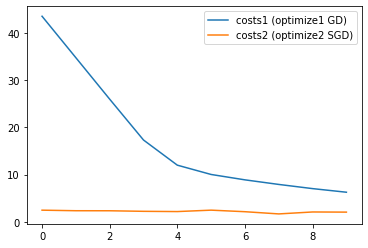

In [26]:
plt.plot(costs1)
plt.plot(costs2)
plt.legend(['costs1 (optimize1 GD)','costs2 (optimize2 SGD)'])
plt.show()

- Implement the Adam optimization method using the numpy library and compare the accuracy of the model fitted with it with the models trained by the classic GD and SGD algorithms

In [27]:
class AdamOptim():

    def __init__(self, eta=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.m_dw, self.v_dw = 0, 0
        self.m_db, self.v_db = 0, 0
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.eta = eta
        pass

    def update(self, t, w, b, dw, db):
        ## dw, db are from current mini-batch
        ## momentum beta 1
        # *** weights *** #
        self.m_dw = self.beta1*self.m_dw + (1-self.beta1)*dw
        # *** biases *** #
        self.m_db = self.beta1*self.m_db + (1-self.beta1)*db

        ## rms beta 2
        # *** weights *** #
        self.v_dw = self.beta2*self.v_dw + (1-self.beta2)*(dw**2)
        # *** biases *** #
        self.v_db = self.beta2*self.v_db + (1-self.beta2)*(db)

        ## bias correction
        m_dw_corr = self.m_dw/(1-self.beta1**t)
        m_db_corr = self.m_db/(1-self.beta1**t)
        v_dw_corr = self.v_dw/(1-self.beta2**t)
        v_db_corr = self.v_db/(1-self.beta2**t)

        ## update weights and biases
        w = w - self.eta*(m_dw_corr/(np.sqrt(v_dw_corr)+self.epsilon))
        b = b - self.eta*(m_db_corr/(np.sqrt(v_db_corr)+self.epsilon))
        return w, b
        
    def show_info(self):
      oround = lambda args, digits=5: round(args, digits) if (type(args) in (int, float, complex) ) else [round(i, digits) for i in args]
      info = {
        'm_dw':     oround(self.m_dw),
        'v_dw':     oround(self.v_dw),
        'm_db':     oround(self.m_db),
        'v_db':     oround(self.v_db),
        'beta1':    oround(self.beta1),
        'beta2':    oround(self.beta2), 
        'epsilon':  oround(self.epsilon),
        'eta':      oround(self.eta)
      }
      print(info)
      return info

In [33]:
eta = 0.1
epsilon = 1e-1
adam = AdamOptim(eta=eta, epsilon=epsilon)

w_0, b_0 = np.random.uniform(-1, 1, size=(train_x.shape[1], 1)), 3.

t = 1

prev_dif = 0

# grad_vector = lambda args: [*args]
grad_vector = lambda args: sigmoid(np.dot(args.T, X))

multiComparing = lambda args1, args2: [(np.round(a1, 20) == np.round(a2, 20)) for a1, a2 in zip(args1, args2)]

while True:

    dw = grad_vector(w_0)
    db = b_0

    w_0_old = w_0
    w_0, b_0 = adam.update(t, w=w_0, b=b_0, dw=dw, db=db)

    if (np.any(multiComparing(w_0, w_0_old))):
        print('converged after '+str(t)+' iterations')
        break
    else:
        # adam.show_info()
        # print('iteration '+str(t)+': weight='+str(w_0), 'bias='+str(b_0)+'\n')
        t+=1
        pass

    continue

print(w_0)
print(b_0)
adam.show_info()

ValueError: operands could not be broadcast together with shapes (1776,1125) (1125,1125) 